# WeatherPy

## Observations and Inferences

1. As expected, the closer to lat 0, the higher the max temperature. We also note the higher max temps in the southern hemisphere, as it is currently the summer season there at the moment. 

2. There seems to be a positive relationship between humidity and latitude in the northern hemisphere, it is most likely cause by a skew in the data as we have a lot data points in with high latitude values.

3. We note that cloudiness also has a positive trend in both the southern and northern hemispheres.

4. Wind speed seems unaffected by latitude in the northern hemisphere but has a slight negative relationship in the southern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import csv

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

from datetime import date

today = date.today()

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print('Begining Data Retrival')
print('-----------------------------')

city_weather_data = []
unit = 'imperial'

for city in cities:
    city_url = city.replace(" ", "&")
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_url}&appid={weather_api_key}&units={unit}"
    response = requests.get(query_url)
    response_json = response.json()
    if response_json['cod'] == 200:
        city_weather_data.append(response_json)        
        print(f'Processing Record Number {cities.index(city) + 1} | {city}')
    else:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrival is now complete')
    

Begining Data Retrival
-----------------------------
Processing Record Number 1 | new norfolk
Processing Record Number 2 | upernavik
Processing Record Number 3 | isilkul
Processing Record Number 4 | ribeira grande
Processing Record Number 5 | souillac
Processing Record Number 6 | hermanus
Processing Record Number 7 | bluff
Processing Record Number 8 | tenenkou
Processing Record Number 9 | ermelo
Processing Record Number 10 | mataura
Processing Record Number 11 | ushuaia
Processing Record Number 12 | asau
Processing Record Number 13 | tasiilaq
Processing Record Number 14 | omsukchan
City not found. Skipping...
City not found. Skipping...
Processing Record Number 17 | busselton
Processing Record Number 18 | tuatapere
Processing Record Number 19 | saint-francois
Processing Record Number 20 | paamiut
Processing Record Number 21 | tautira
Processing Record Number 22 | cayenne
Processing Record Number 23 | grindavik
Processing Record Number 24 | oktyabrskiy
Processing Record Number 25 | naza

Processing Record Number 213 | yellowknife
Processing Record Number 214 | kilindoni
Processing Record Number 215 | yumen
Processing Record Number 216 | isangel
Processing Record Number 217 | cauquenes
Processing Record Number 218 | severo-kurilsk
Processing Record Number 219 | kultuk
Processing Record Number 220 | budapest
City not found. Skipping...
Processing Record Number 222 | estevan
City not found. Skipping...
Processing Record Number 224 | lorengau
Processing Record Number 225 | thurso
Processing Record Number 226 | longyearbyen
Processing Record Number 227 | quepos
Processing Record Number 228 | eten
Processing Record Number 229 | ilulissat
Processing Record Number 230 | alofi
Processing Record Number 231 | cap malheureux
Processing Record Number 232 | praia da vitoria
Processing Record Number 233 | katsuura
Processing Record Number 234 | san policarpo
Processing Record Number 235 | bundaberg
Processing Record Number 236 | condado
Processing Record Number 237 | meiringen
Proces

Processing Record Number 425 | annur
Processing Record Number 426 | kokoda
Processing Record Number 427 | hovd
City not found. Skipping...
Processing Record Number 429 | beyneu
Processing Record Number 430 | horta
Processing Record Number 431 | richards bay
Processing Record Number 432 | namatanai
City not found. Skipping...
Processing Record Number 434 | dunedin
Processing Record Number 435 | lixourion
Processing Record Number 436 | mecca
Processing Record Number 437 | lokosovo
Processing Record Number 438 | lakes entrance
Processing Record Number 439 | payson
Processing Record Number 440 | matara
Processing Record Number 441 | khasan
Processing Record Number 442 | cherskiy
Processing Record Number 443 | kiruna
Processing Record Number 444 | lasa
Processing Record Number 445 | moyale
Processing Record Number 446 | berlevag
City not found. Skipping...
Processing Record Number 448 | pulawy
Processing Record Number 449 | antalaha
Processing Record Number 450 | durham
Processing Record Nu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
win_speed = []
country = []
date = []

for i in range(len(city_weather_data)):
    name.append(city_weather_data[i]['name'])
    lat.append(city_weather_data[i]['coord']['lat'])
    lon.append(city_weather_data[i]['coord']['lon'])
    temp_max.append(city_weather_data[i]['main']['temp_max'])
    humidity.append(city_weather_data[i]['main']['humidity'])
    clouds.append(city_weather_data[i]['clouds']['all'])
    win_speed.append(city_weather_data[i]['wind']['speed'])
    country.append(city_weather_data[i]['sys']['country'])
    date.append(city_weather_data[i]['dt'])
    
city_weather_data_df = pd.DataFrame({
    'City' : name,
    'Lat' : lat,
    'Lng' : lon,
    'Max Temp' : temp_max,
    'Humidity' : humidity,
    'Cloudiness' : clouds,
    'Wind Speed' : win_speed,
    'Country' : country,
    'Date' : date
})

city_weather_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New,6.6518,-10.5932,77.00,94,20,3.04,LR,1613005169
1,Upernavik,72.7868,-56.1549,-2.63,91,100,13.04,GL,1613005169
2,Isil'kul',54.9109,71.2728,-27.15,84,1,3.91,RU,1613005169
3,Ribeira,42.7461,-8.4439,50.00,100,75,9.22,ES,1613005169
4,Souillac,-20.5167,57.5167,78.80,73,40,9.22,MU,1613005169


In [5]:
city_weather_data_df.agg(['count','mean','median','min','max'])

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,545,545.00000,545.00000,545.000000,545.000000,545.000000,545.000000,545,5.450000e+02
min,Abaza,-54.80000,-179.16670,-32.800000,13.000000,0.000000,0.130000,AE,1.613005e+09
max,Şebinkarahisar,78.21860,179.31670,90.590000,100.000000,100.000000,37.920000,ZW,1.613005e+09
mean,NaN,22.32208,19.17273,48.117413,72.807339,54.207339,7.425853,NaN,1.613005e+09
median,NaN,25.36160,24.14660,57.990000,78.000000,75.000000,5.750000,NaN,1.613005e+09


In [6]:
#export to csv
city_weather_data_df.to_csv('../Output/city_weather_data.csv',header = True, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----

In [7]:
city_weather_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [8]:
#  Get the indices of cities that have humidity over 100%.
over_100 = city_weather_data_df.loc[city_weather_data_df['Humidity']>100]
over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
city_weather_data_df = city_weather_data_df.loc[city_weather_data_df['Humidity']<=100,:]

In [10]:
#make a copy to work with
clean_df = city_weather_data_df.copy()

## Plotting the Data

## Latitude vs. Temperature Plot

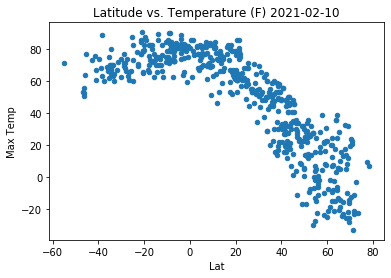

In [51]:
plot1 = clean_df.plot('Lat',
                      'Max Temp',
                      kind = 'scatter',
                      title = f'Latitude vs. Temperature (F) {today}').get_figure().savefig('../Output/01lat_vs_temp.png')

We can see how max temperatures peak at lat 0 and remain high in the southern hemisphere which is experiencing the summer season. Conversely max temperature drop significantly in the northern hemisphere where is it winter.

## Latitude vs. Humidity Plot

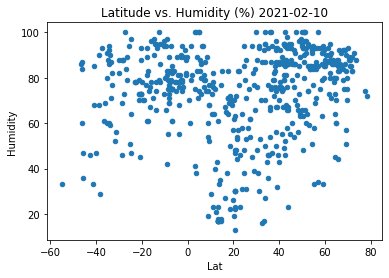

In [52]:
clean_df.plot('Lat',
              'Humidity',
              kind = 'scatter',
              title = f'Latitude vs. Humidity (%) {today}').get_figure().savefig('../Output/02lat_vs_humidity.png')

The plot above demostrates there isn't a relationship between latitude and humidity. All the points are scattered without any discernible relationship.

## Latitude vs. Cloudiness Plot

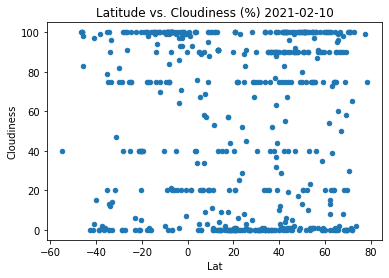

In [53]:
clean_df.plot('Lat',
              'Cloudiness',
              kind = 'scatter',
              title = f'Latitude vs. Cloudiness (%) {today}').get_figure().savefig('../Output/03lat_vs_cloud.png')

this is interesting as we see several distict tiers of "cloudiness" (100,75,0 etc)but it is hard to disern any relationship from just this chart

## Latitude vs. Wind Speed Plot

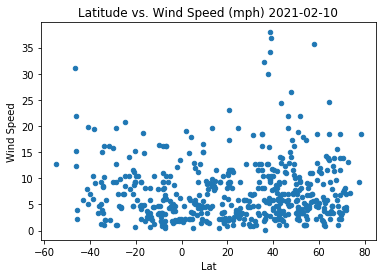

In [54]:
clean_df.plot('Lat',
              'Wind Speed',
              kind = 'scatter',
              title = f'Latitude vs. Wind Speed (mph) {today}').get_figure().savefig('../Output/04lat_vs_wind.png')

While there isn't a strong relationship there seems to be a slight u shape in the data points implying there may be faster winds away from the equator

## Linear Regression

In [55]:
north_df = clean_df[clean_df['Lat']>0]
south_df = clean_df[clean_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7731685967601603


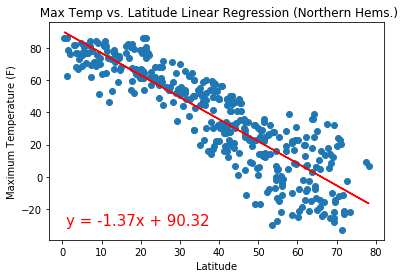

In [56]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-30),fontsize=15,color="red")
plt.title(' Max Temp vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/05lat_vs_temp_north.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.27260265151638813


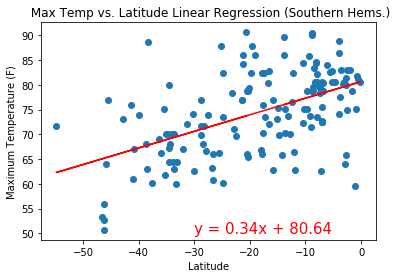

In [57]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title(' Max Temp vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/06lat_vs_temp_south.png')
plt.show()

Our regression analysis confirms our suspicions from our scatter plots. Max temperatures rise closer to the equator. The relationship is a lot more clear in the northern hemisphere were we have more data points and a greater variation in temperature. Since the southern hemispher is in summer at the moment, there is less variation in temperature (ranging from just about 50 to just under 90) meaning the relationship appears weaker.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14497809027999561


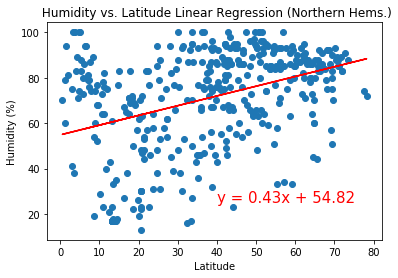

In [58]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(' Humidity vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/07lat_vs_humidity_north.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0899403743155151


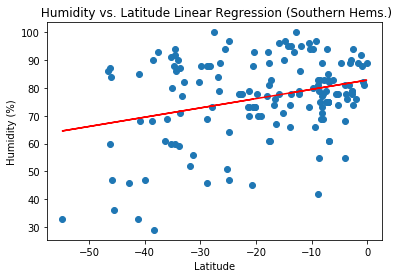

In [59]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title(' Humidity vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/08lat_vs_humidity_south.png')

plt.show()

We can see a positive relationship between humidity and latitude for both the southern and northern hemispher though it is a lot stronger in the northern hemisphere, again where there is more variation as well as data points.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019992692539883953


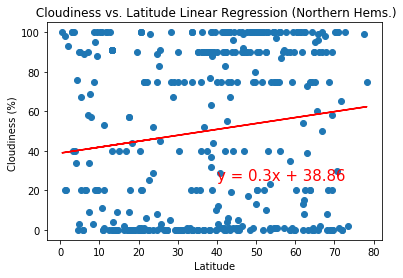

In [60]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(' Cloudiness vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/09lat_vs_cloud_north.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06530225431001332


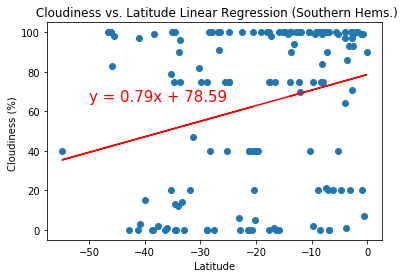

In [61]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")
plt.title(' Cloudiness vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/10lat_vs_cloud_south.png')
plt.show()

The regression line makes it alot easier to see the relationships as opposed to just the scatter plot as the data points were very bunched up. We can see a positive relationship between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005600065510417235


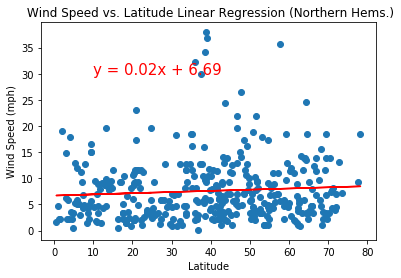

In [62]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title(' Wind Speed vs. Latitude Linear Regression (Northern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/11lat_vs_wind_north.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11239012335066373


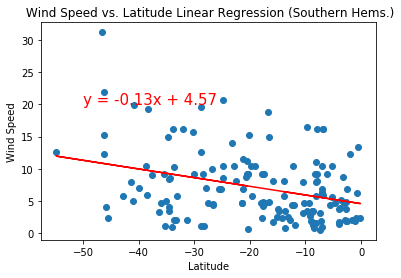

In [63]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title(' Wind Speed vs. Latitude Linear Regression (Southern Hems.)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Output/12lat_vs_wind_south.png')
plt.show()

Interestingly there seems to be no relationship in the northern hemisphere but a negative relationship in the southern hemisphere. 